<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [41]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [42]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [43]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [44]:
boston_df=pd.read_csv(boston_url)
boston_df.describe()

#データセットの変数について以下に説明する：
# CRIM - 町ごとの一人当たり犯罪率
# ZN - 25,000平方フィート以上の住宅用地の割合。
# INDUS - 町ごとの非小売業用地の割合
# CHAS - チャールズ川のダミー変数（川がある場合は1、ない場合は0）。
# NOX-一酸化窒素濃度（1000万分の1）
# RM - 1住宅あたりの平均部屋数。
# AGE - 1940年以前に建てられた持ち家の割合。
# DIS-ボストンの5つの雇用中心地までの距離を加重平均したもの
# RAD-放射状高速道路へのアクセス指数
# TAX-1万ドル当たりの固定資産税評価額
# PTRATIO-町ごとの生徒数と教師数の比率
# LSTAT - 低所得層の人口比率
# MEDV-1,000ドル単位の持ち家の中央値。

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Median for Charles River: 23.3
Median for Non-Charles River: 20.9
T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


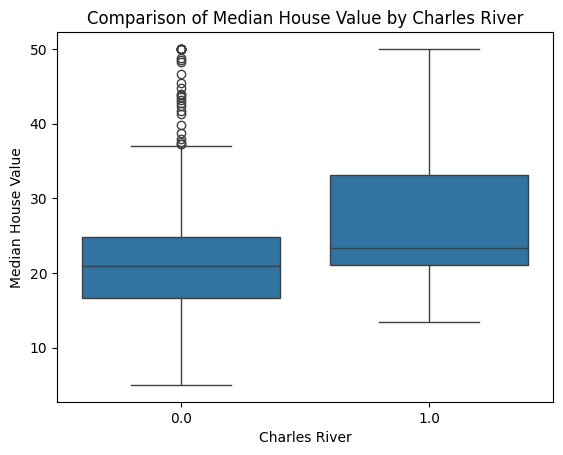

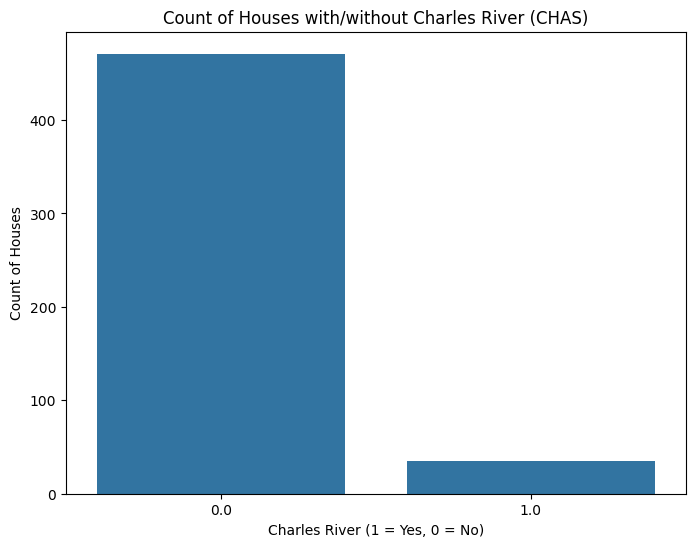

In [53]:
# 1. チャールズ川に囲まれた住宅の中央値に有意な差があるか
# アプローチ：チャールズ川に囲まれた住宅（charles_river）とそうでない住宅の2グループに分け、それぞれの住宅の価格の中央値を比較します。これには、独立した2サンプルt検定（またはマン・ホイットニーU検定）を使用し、有意差があるかどうかを確認します。
# 手法：
# charles_riverが0（川に囲まれていない）または1（川に囲まれている）である場合に、住宅価格（medv）の中央値を比較します。
# 有意差があるかどうかを判断するため、t検定またはノンパラメトリック検定を使用します。
# 解釈：もしp_valueが0.05未満なら、チャールズ川に囲まれた住宅と囲まれていない住宅の間で有意な価格の差があると結論できます。

import scipy.stats as stats
# 川に囲まれている住宅と囲まれていない住宅のデータを分ける
charles_river_houses = boston_df[boston_df['CHAS'] == 1]
non_charles_river_houses = boston_df[boston_df['CHAS'] == 0]

# 各グループの中央値を計算
median_charles_river = charles_river_houses['MEDV'].median()
median_non_charles_river = non_charles_river_houses['MEDV'].median()

# t検定を実行
t_stat, p_value = stats.ttest_ind(charles_river_houses['MEDV'], non_charles_river_houses['MEDV'])

print(f'Median for Charles River: {median_charles_river}')
print(f'Median for Non-Charles River: {median_non_charles_river}')
print(f'T-statistic: {t_stat}, P-value: {p_value}')

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=boston_df['CHAS'], y=boston_df['MEDV'], data=boston_df)
plt.xlabel('Charles River')
plt.ylabel('Median House Value')
plt.title('Comparison of Median House Value by Charles River')
plt.show()

# チャールズ川の変数の棒グラフ
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Count of Houses with/without Charles River (CHAS)')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count of Houses')
plt.show()

<ipython-input-70-07d8e4d8006e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = boston_df.groupby('AGE_category')['MEDV'].describe()


              count       mean       std   min    25%    50%     75%   max
AGE_category                                                              
Low           147.0  26.693197  7.312774  16.1  21.75  24.40  30.650  50.0
Med           119.0  24.225210  7.937513   6.3  20.05  22.40  27.300  50.0
High          240.0  19.145417  9.558259   5.0  13.50  17.25  21.525  50.0


<ipython-input-70-07d8e4d8006e>:35: DegenerateDataWarning: at least one input has length 0
  f_stat, p_val = f_oneway(low_age, mid_age, high_age)


F-statistic: nan, p-value: nan
Kruskal-Wallis statistic: nan, p-value: nan


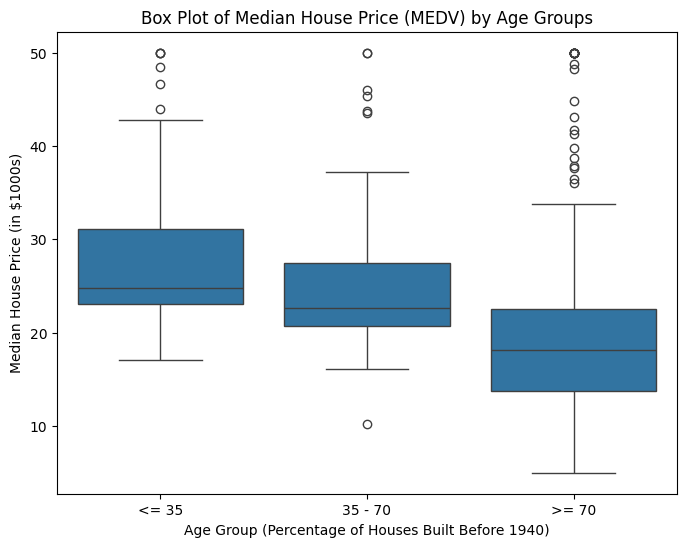

In [70]:
# 2. 1940年以前に建てられた持ち家の各比率の住宅の中央値に差はあるか
# アプローチ：1940年以前に建てられた住宅（ageが1940年以前かどうか）とそれ以外の住宅の住宅価格の中央値を比較します。t検定またはノンパラメトリック検定を使用して差が有意かどうかを確認します。
# 手法：age変数を使用して、1940年以前に建てられた住宅とそれ以外の住宅を分類し、価格の中央値を比較します。

# 1 グループ間の記述統計
# 各「AGEカテゴリ」ごとに「MEDV」の平均値、中央値、分散などを計算。
# データの傾向をつかむ。

import pandas as pd

# グループ化してMEDVの記述統計を表示
age_groups = ['<= 35', '35 - 70', '>= 70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=age_groups)
group_stats = boston_df.groupby('AGE_category')['MEDV'].describe()
print(group_stats)


# 2 グループ間の差の検定
#2.1 一元配置分散分析（ANOVA）
#「AGEカテゴリ」による「MEDV」の平均値の差を検定します。
# 仮定: 「AGEカテゴリ」間で「MEDV」に有意な差がある。

from scipy.stats import f_oneway

# 各グループのMEDVデータ

low_age = boston_df[boston_df['AGE_category'] == '<= 35']['MEDV']
mid_age = boston_df[boston_df['AGE_category'] == '35 - 70']['MEDV']
high_age = boston_df[boston_df['AGE_category'] == '>= 70']['MEDV']



# ANOVA検定

f_stat, p_val = f_oneway(low_age, mid_age, high_age)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

#2.2 Kruskal-Wallis検定
# ANOVAの仮定（正規性や分散の等質性）が満たされない場合に使用。

from scipy.stats import kruskal
kruskal_stat, kruskal_p = kruskal(low_age, mid_age, high_age)
print(f"Kruskal-Wallis statistic: {kruskal_stat}, p-value: {kruskal_p}")


# 3 視覚化
# グループごとの「MEDV」の分布を箱ひげ図やバイオリンプロットで可視化。

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Box Plot of Median House Price (MEDV) by Age Groups')
plt.xlabel('Age Group (Percentage of Houses Built Before 1940)')
plt.ylabel('Median House Price (in $1000s)')
plt.show()

# 3. 結果の解釈
# ANOVAまたはKruskal-Wallis検定でp値が0.05未満であれば、「AGEカテゴリ」による「MEDV」の差が統計的に有意であると判断。
# 平均値や中央値、分布の傾向を元に具体的なインサイトを得る。




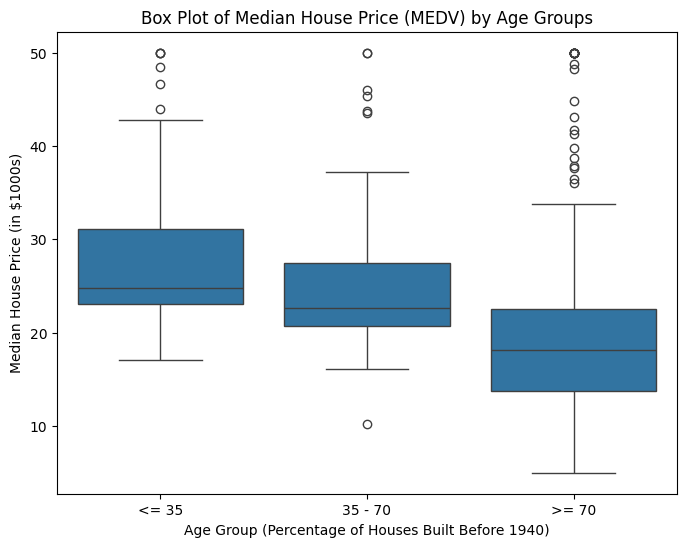

In [16]:
# AGEのカテゴリーを作成
age_groups = ['<= 35', '35 - 70', '>= 70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=age_groups)

# 箱ひげ図の作成
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Box Plot of Median House Price (MEDV) by Age Groups')
plt.xlabel('Age Group (Percentage of Houses Built Before 1940)')
plt.ylabel('Median House Price (in $1000s)')
plt.show()


Correlation between NOx and industrial acreage: 0.763651446920914


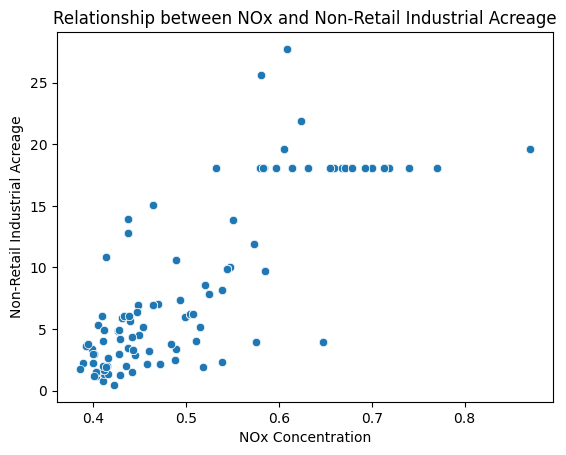

In [71]:
# 3. 一酸化窒素濃度と町ごとの非小売業のエーカーの割合との間には関係がないか
# アプローチ：一酸化窒素濃度（nox）と町ごとの非小売業エーカー割合（indus）の間に相関関係があるかどうかを調べます。ピアソンの相関係数を計算し、相関が有意かを確認します。
# 手法：一酸化窒素濃度（nox）と非小売業エーカーの割合（indus）の間にピアソン相関係数を計算します。
# 解釈：相関係数が0に近ければ、これらの変数に強い関係はないと結論できます。

correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print(f'Correlation between NOx and industrial acreage: {correlation}')

sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel('NOx Concentration')
plt.ylabel('Non-Retail Industrial Acreage')
plt.title('Relationship between NOx and Non-Retail Industrial Acreage')
plt.show()


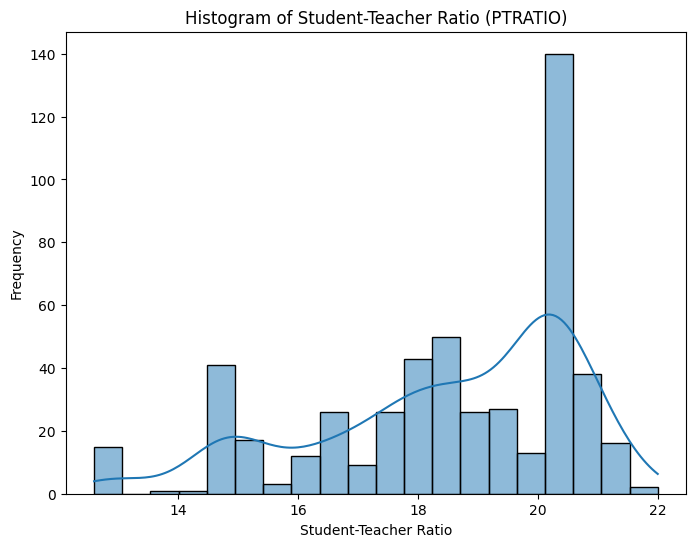

In [18]:
# ヒストグラムの作成
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=20)
plt.title('Histogram of Student-Teacher Ratio (PTRATIO)')
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [21]:
from scipy import stats

# チャールズ川がある場合とない場合でMEDVの平均を比較
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# 独立標本t検定を実行
t_stat, p_value = stats.ttest_ind(chas_yes, chas_no)

# 結果
t_stat, p_value


(3.996437466090509, 7.390623170519905e-05)

In [26]:
# AGEを3つのグループに分ける
age_groups = ['<= 35', '35 - 70', '>= 70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=age_groups)

# 各AGEグループごとにMEDVを抽出
medv_by_age_group = [boston_df[boston_df['AGE_group'] == group]['MEDV'] for group in age_groups]

# ANOVAを実行
f_stat, p_value = stats.f_oneway(*medv_by_age_group)

# 結果
f_stat, p_value

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

In [27]:
# ピアソン相関を実行
corr_stat, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# 結果
corr_stat, p_value

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        07:50:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from sklearn.linear_model import LinearRegression

# 特徴量とターゲット変数を設定
X = boston_df[['DIS']]
y = boston_df['MEDV']

# 回帰分析モデルの作成
model = LinearRegression()
model.fit(X, y)

# 回帰係数とp値
coeff = model.coef_[0]
intercept = model.intercept_

# 回帰モデルの予測値とR^2
r2_score = model.score(X, y)

coeff, intercept, r2_score

(1.0916130158411106, 18.39008833049338, 0.062464372121782796)

In [ ]:
# 結論:
#回帰係数が有意（p値がα = 0.05未満）で、R²が高い場合: DISがMEDVに有意な影響を与えると結論します。
#回帰係数が有意でない（p値がα = 0.05以上）場合: DISはMEDVに有意な影響を与えないと結論します。